In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Load dataset
pet = pd.read_csv('pet_supplies_2212.csv')

pet.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [14]:
from summarytools import dfSummary

dfSummary(pet)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,product_id[int64],Mean (sd) : 750.5 (433.2)min < med < max:1.0 < 750.5 < 1500.0IQR (CV) : 749.5 (1.7),"1,500 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,category[object],1. Equipment2. Food3. Toys4. Medicine5. Housing6. Accessory7. -,370 (24.7%)260 (17.3%)255 (17.0%)237 (15.8%)227 (15.1%)126 (8.4%)25 (1.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAChCAYAAADQgM1HAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC70lEQVR4nO3dMWobUQBF0a8gTNJICIMXo0VksVmEdmOMp4hNGqVIbBSRxsJzx1jndO5+cflihnl4dTweBxS+LH0ArofYyIiNjNjIiI3MaozxbYxxs/RB/uPX8Xh8WvoQvJ/17e3t981ms1v6IOemaXpYrVY/BPd5rDebzW6/3z9tt9vnpQ/z4vHx8evhcNjd39/fjDHE9kmsxxhju90+393d/Vz6MGe+LX0A3pcHBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLrMf580rP0QU59tPPwPtbTND0cDofd+GCf9EzT9DDG+LX0OXg/Pgsns7KIp1LfbG6rK5YOXoxYrls2eDFioR68fKgnXlpe6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5lsXWUxRbquspi6bjYIZKyryJQ3m1vtymXrKssqknWVZRVjtOsqy6or56UuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbmWTwYuzCGOHgxdgFn4WTMXgh4wGBTPEz6ueTMUawrrKq4sWs6yqrKk4V6yqrKsYYHhAIiY2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIzLqusqri1OzrKqsqXvgsnIx1FZm5bza3Gq9mHbwYu3BqtsGLsQvn5h68GLvwyktdMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrMNXoxdODfr4MXYhVM+Cydj8ELGAwKZS39G/TzyZhetq6ymuMSb11VWU1zq0nWV1RRv5gGBjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzJvXVVZTXOqidZXVFJfwWTgZ6yoy5zebG4vZ/DN4MWRhTl9eBi/7/f7pb3Rz/jtIrtjr4OXv34YszMZLXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIzPb/66Cc6frKqspZmWDQMa6iowHBDJiIyM2MmIj8xtkCGy2+TGs2gAAAABJRU5ErkJggg=="">",0(0.0%)
3,animal[object],1. Cat2. Fish3. Dog4. Bird,567 (37.8%)369 (24.6%)367 (24.5%)197 (13.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB2UlEQVR4nO3bMWrjUBiF0V+DCJNGwhi8GC8ii51FaDfGWMUkpNEU0yap5PuEdM4KnuFD5gndblmWgoRfrQ/AcYiNmK6qXqvqpfVBQj6XZXlvfYij6s/n89swDKfWB0mY5/nedd0fwbXRD8Nwul6v7+M4frQ+zDM9Ho/f0zSdbrfbS1WJrYG+qmocx4/L5fK39WECXlsf4MhcEIgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNmL7q/+c3rQ/ybEf4jVvXz/N8n6bpVAf4/Gae53tVfbY+x1H5LJyYzpSPFBcEYrb8N+ovb2c2u66yhNqfTa6rLKH2acvrqt2/ijkaFwRixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxGxyyre187COzU75zO72xwaBGFM+YjzZiLGuIsa6ihjrKmK81CVGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjHUVMdZVxNggEGNdRcwznmyeSHxp9XWVVRTfWXVdZRXFT56xrtrUrZbt8FKXGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzGrrqusovjJ6usqqyi+Y4NAjHUVMS4IxPwDs1jYuWJISi0AAAAASUVORK5CYII="">",0(0.0%)
4,size[object],1. small2. medium3. Small4. SMALL5. Medium6. large7. MEDIUM8. Large9. LARGE,372 (24.8%)233 (15.5%)225 (15.0%)157 (10.5%)150 (10.0%)122 (8.1%)109 (7.3%)75 (5.0%)57 (3.8%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADPCAYAAADifqNtAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADiklEQVR4nO3cQWobWQBF0a9GhM5Ewhi8GC+iF9uL0G6MsQadkIkyCA7GOI6qVHVl0ues4A8uX1RRT5vT6TSg8Ne1D8D/h9jIiI2M2MiIjYzYyIiNzGaM8XmM8enaB3nDt9Pp9OXah2A529vb2392u93NtQ/y2vF4fNxsNv8K7s+x3e12N/f391/2+/3Xax/

In [3]:
pet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


# Task 1

### Product_id

In [4]:
pet['product_id'].nunique()

1500

In [5]:
pet.product_id.value_counts()

1       1
998     1
1007    1
1006    1
1005    1
       ..
498     1
497     1
496     1
495     1
1500    1
Name: product_id, Length: 1500, dtype: int64

In [6]:
pet.category.isnull().sum()

0

Product_id: There are 1500 unique values that match the description given. There are no missing values. No changes were made to this column.

### Category

In [7]:
pet.category.nunique()

7

In [8]:
pet.category.value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64

In [9]:
pet.category.unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       '-'], dtype=object)

In [10]:
pet.category.isnull().sum()

0

Category: There were six unique values that match the six given in the data dictionary. There were 25 missing values represented with a hyphen(-).The missing values were replaced with Unknown as per the data description.

In [11]:
pet.category = pet.category.replace('-','Unknown')

In [12]:
pet.category.nunique()

7

In [13]:
pet.category.unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       'Unknown'], dtype=object)

### Animal

In [14]:
pet.animal.unique()

array(['Bird', 'Dog', 'Cat', 'Fish'], dtype=object)

In [15]:
pet.animal.nunique()

4

In [16]:
pet.animal.value_counts()

Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64

In [17]:
pet.animal.isnull().sum()

0

Animal: There are 4 unique values that match the description given. There are no missing values. No changes were made to this column.

### Size

In [18]:
pet['size'].value_counts()

small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: size, dtype: int64

In [19]:
pet['size'].unique()

array(['large', 'MEDIUM', 'medium', 'small', 'Small', 'Large', 'SMALL',
       'Medium', 'LARGE'], dtype=object)

In [20]:
pet['size'].nunique()

9

In [21]:
pet['size'] = pet['size'].replace({'medium':'Medium','MEDIUM':'Medium','large':'Large','LARGE':'Large','small':'Small',\
                                   'SMALL':'Small'})

In [22]:
pet['size'].nunique()

3

In [23]:
pet['size'].unique()

array(['Large', 'Medium', 'Small'], dtype=object)

In [24]:
pet['size'].isnull().sum()

0

Size: There were 3 unique values that match the description given. However, the three values had variations in terms of their case(Upper case, lower case and the Capitalized case). These variations were transformed to the Capitalized format as it matches the case in the description. No missing values.

### Price

In [25]:
pet.price.nunique()

707

In [26]:
pet.price.value_counts()

unlisted    150
22.98        13
28           10
28.03         8
19.94         8
           ... 
38.66         1
36            1
19.97         1
39.19         1
25.79         1
Name: price, Length: 707, dtype: int64

In [27]:
pet.price.min()

'12.85'

In [28]:
pet.price.dtype

dtype('O')

In [29]:
pet.price = pd.to_numeric(pet.price)

ValueError: Unable to parse string "unlisted" at position 20

In [30]:
pet.price.iloc[20]

'unlisted'

In [31]:
pet[pet.price==0]

,product_id,category,animal,size,price,sales,rating,repeat_purchase


In [32]:
pet.price.isnull().sum()

0

In [33]:
pet.price = pet.price.replace('unlisted',0)

In [34]:
pet[pet.price==0]

,product_id,category,animal,size,price,sales,rating,repeat_purchase
20,21,Food,Fish,Medium,0,542.06,NaN,0
44,45,Medicine,Bird,Medium,0,1209.41,NaN,0
46,47,Toys,Cat,Small,0,1367.47,NaN,1
70,71,Equipment,Dog,Large,0,1446.43,NaN,0
73,74,Food,Bird,Large,0,1864.01,NaN,0
...,...,...,...,...,...,...,...,...
1447,1448,Medicine,Fish,Medium,0,456.96,NaN,1
1469,1470,Equipment,Fish,Small,0,710.47,NaN,0
1471,1472,Toys,Fish,Small,0,976.63,NaN,0
1476,1477,Housing,Bird,Large,0,1567.31,NaN,1


In [35]:
pet.price.dtype

dtype('O')

In [36]:
pet.price = pet.price.astype('float')

In [37]:
pet.price.median()

27.93

In [38]:
pet.price = pet.price.replace(0, pet.price.median())

In [39]:
pet[pet.price==0]

,product_id,category,animal,size,price,sales,rating,repeat_purchase


In [40]:
pet.price.isnull().sum()

0

In [41]:
print('Range: ', pet.price.min(), 'to ', pet.price.max())

Range:  12.85 to  54.16


Price: The datatype didn't match the description given. The description given stated a continuous datatype but it was in Object format - another word for string. This was due to values in the price column named unlisted. These values were first replaced with 0 after checking if any value in the column was equal to 0. The column was then converted to numeric or float datatype. Then the values that were 0 were further replced with the overall median value which is 27.93. The price ranged from 12.85 to 54.16

### Sales

In [42]:
pet.sales.dtype

dtype('float64')

In [43]:
pet.sales.min(), pet.sales.max()

(286.94, 2255.96)

In [44]:
pet.sales.isnull().sum()

0

In [63]:
pet.sales.mean()

996.5978466666667

Sales: The values of this column ranged from 286.94 to 2255.96, which is consistent with the description given. No missing values. No changes were made to this column

### Rating

In [45]:
pet.rating.unique()

array([ 7.,  6.,  5.,  4.,  8.,  1.,  3., nan,  2.,  9.])

In [46]:
pet.rating.value_counts()

5.0    304
6.0    299
4.0    283
3.0    190
7.0    143
8.0     61
2.0     43
9.0     15
1.0     12
Name: rating, dtype: int64

In [47]:
pet.rating.isnull().sum()

150

In [48]:
pet.rating = pet.rating.fillna(0)

In [49]:
pet.rating.unique()

array([7., 6., 5., 4., 8., 1., 3., 0., 2., 9.])

In [50]:
pet.rating = pet.rating.astype(int)

In [51]:
pet.rating.unique()

array([7, 6, 5, 4, 8, 1, 3, 0, 2, 9])

Rating: The datatype did not match the description given. Instead of discrete(integers) values, the values were formatted as floats. The minimum rating was 1 while the maximum rating was 9. There were 150 missing values. The missing values were replaced with 0.

### Repeat_purchase

In [52]:
pet.repeat_purchase.value_counts()

1    906
0    594
Name: repeat_purchase, dtype: int64

In [53]:
pet.repeat_purchase.nunique()

2

Repeat_purchase: There were two unique categories which are 1 and 0. These categories match the description given. There were no missing values and no changes were made to this column.

# Task 2

In [57]:
sns.set_style('whitegrid')

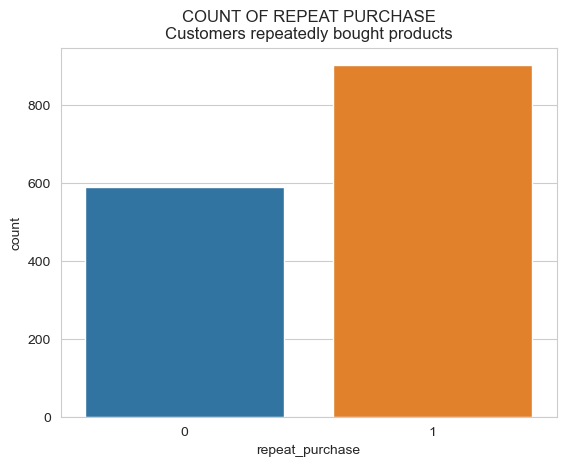

In [85]:
sns.countplot(data=pet, x='repeat_purchase').set(title='COUNT OF REPEAT PURCHASE\nCustomers repeatedly bought products');
#plt.savefig('Repeat Purchase.jpeg')

There are two categories included in this data(whether a product was bought repeatedly(1) or not(0)). The product was bought repeatedly most times. The categories are unbalanaced, with most of the observations being 1(almost 900). The team should focus on such a product and further analysis could be carried out on the product to see what product category or sub-category it is, and what makes customers purchase it repeatedly.

# Task 3

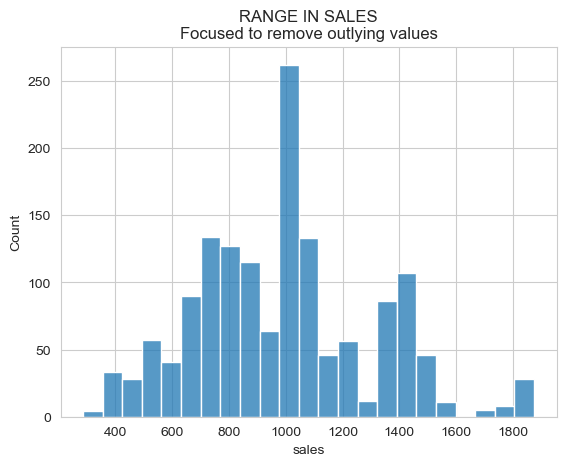

In [86]:
sns.histplot(data=pet, x='sales').set(title='RANGE IN SALES\nFocused to remove outlying values');
#plt.savefig('Sales Range.jpeg')

The company intends to increase sales by selling day-to-day prodcuts repeatedly. As a result, we are taking a look at the distribution of sales. </br></br>The company has made sales mostly around 1,000. There are other things to consider if the company is to increase sales like; the products customers purchase the most, the season with the most purchase, and the products that customers bought repeatedly.

# Task 4

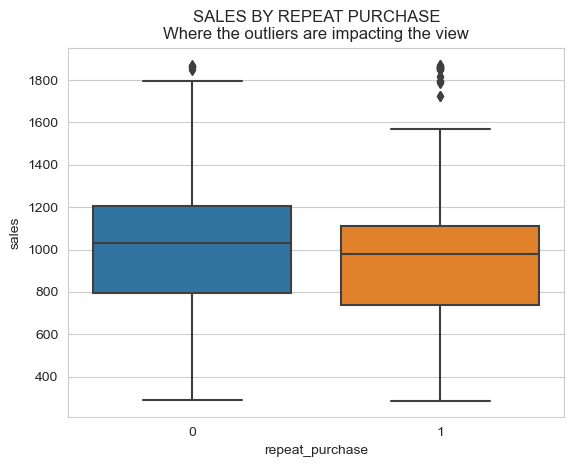

In [87]:
sns.boxplot(data=pet, x='repeat_purchase', y='sales').set_title('SALES BY REPEAT PURCHASE\nWhere the outliers are impacting the view');
#plt.savefig('Sales by Purchase.jpeg')

In [66]:
from scipy import stats

In [68]:
pet['z-score'] = stats.zscore(pet['sales'])

In [78]:
pet[pet['z-score']>3].shape

(7, 9)

In [79]:
pet = pet[pet['z-score']<3]

In [80]:
pet.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase,z-score
0,1,Food,Bird,Large,51.10,1860.62,7,1,2.668014
1,2,Housing,Bird,Medium,35.98,963.60,6,0,-0.101894
2,3,Food,Dog,Medium,31.23,898.30,5,1,-0.303534
3,4,Medicine,Cat,Small,24.95,982.15,6,1,-0.044614
4,5,Housing,Cat,Small,26.18,832.63,7,1,-0.506316


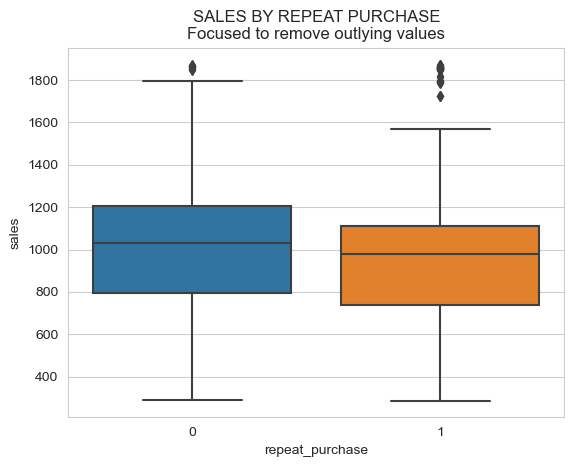

In [88]:
sns.boxplot(data=pet, x='repeat_purchase', y='sales').set_title('SALES BY REPEAT PURCHASE\nFocused to remove outlying values');
#plt.savefig('Sales by Purchase_no_outlier.jpeg')

After removing outliers there's no change in the above visual. As a result, we could recommend that further analysis should be done to understand how repeat purchase affects sales and what can be done to improve the sales of repeat product. By doing this, the company will understand exactly what to do to increase sales with the help and expertise of the marketing team.<br><br>

Everyday products are the best products to invest time and resources into since it'll increase sales and patronage and by implication, increase popularity of the company.